<a href="https://colab.research.google.com/github/irenerv/API-Lambda/blob/main/Introducci%C3%B3n_a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #Gestionar datos
import seaborn as sns #Graficar
import sqlite3 #cargar los datos en una base sql

In [6]:
# Extracción

In [7]:
url = 'https://raw.githubusercontent.com/freevejarano/DatasetsML/main/titanic.csv'
df = pd.read_csv(url)

In [8]:
# Análisis Exploratorio

In [9]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5)

In [ ]:
df.sample(5)

In [16]:
df.info() #información general de los registros y columnas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#Describir las variables númericas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-18-aaaafb6b51a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='seismic', annot=True)


<Axes: >

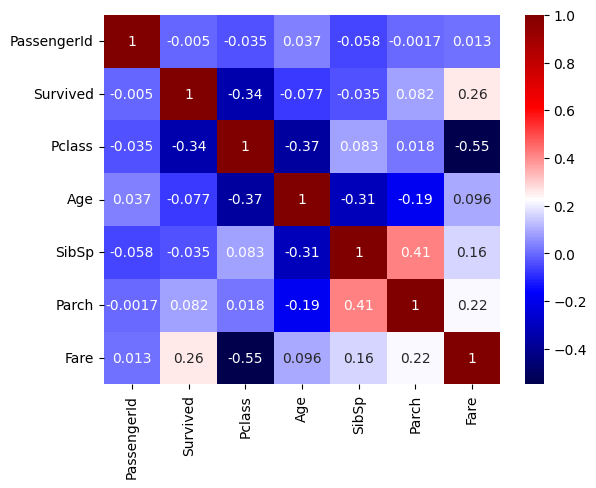

In [18]:
# Mapa de correlaciones

sns.heatmap(df.corr(), cmap='seismic', annot=True)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

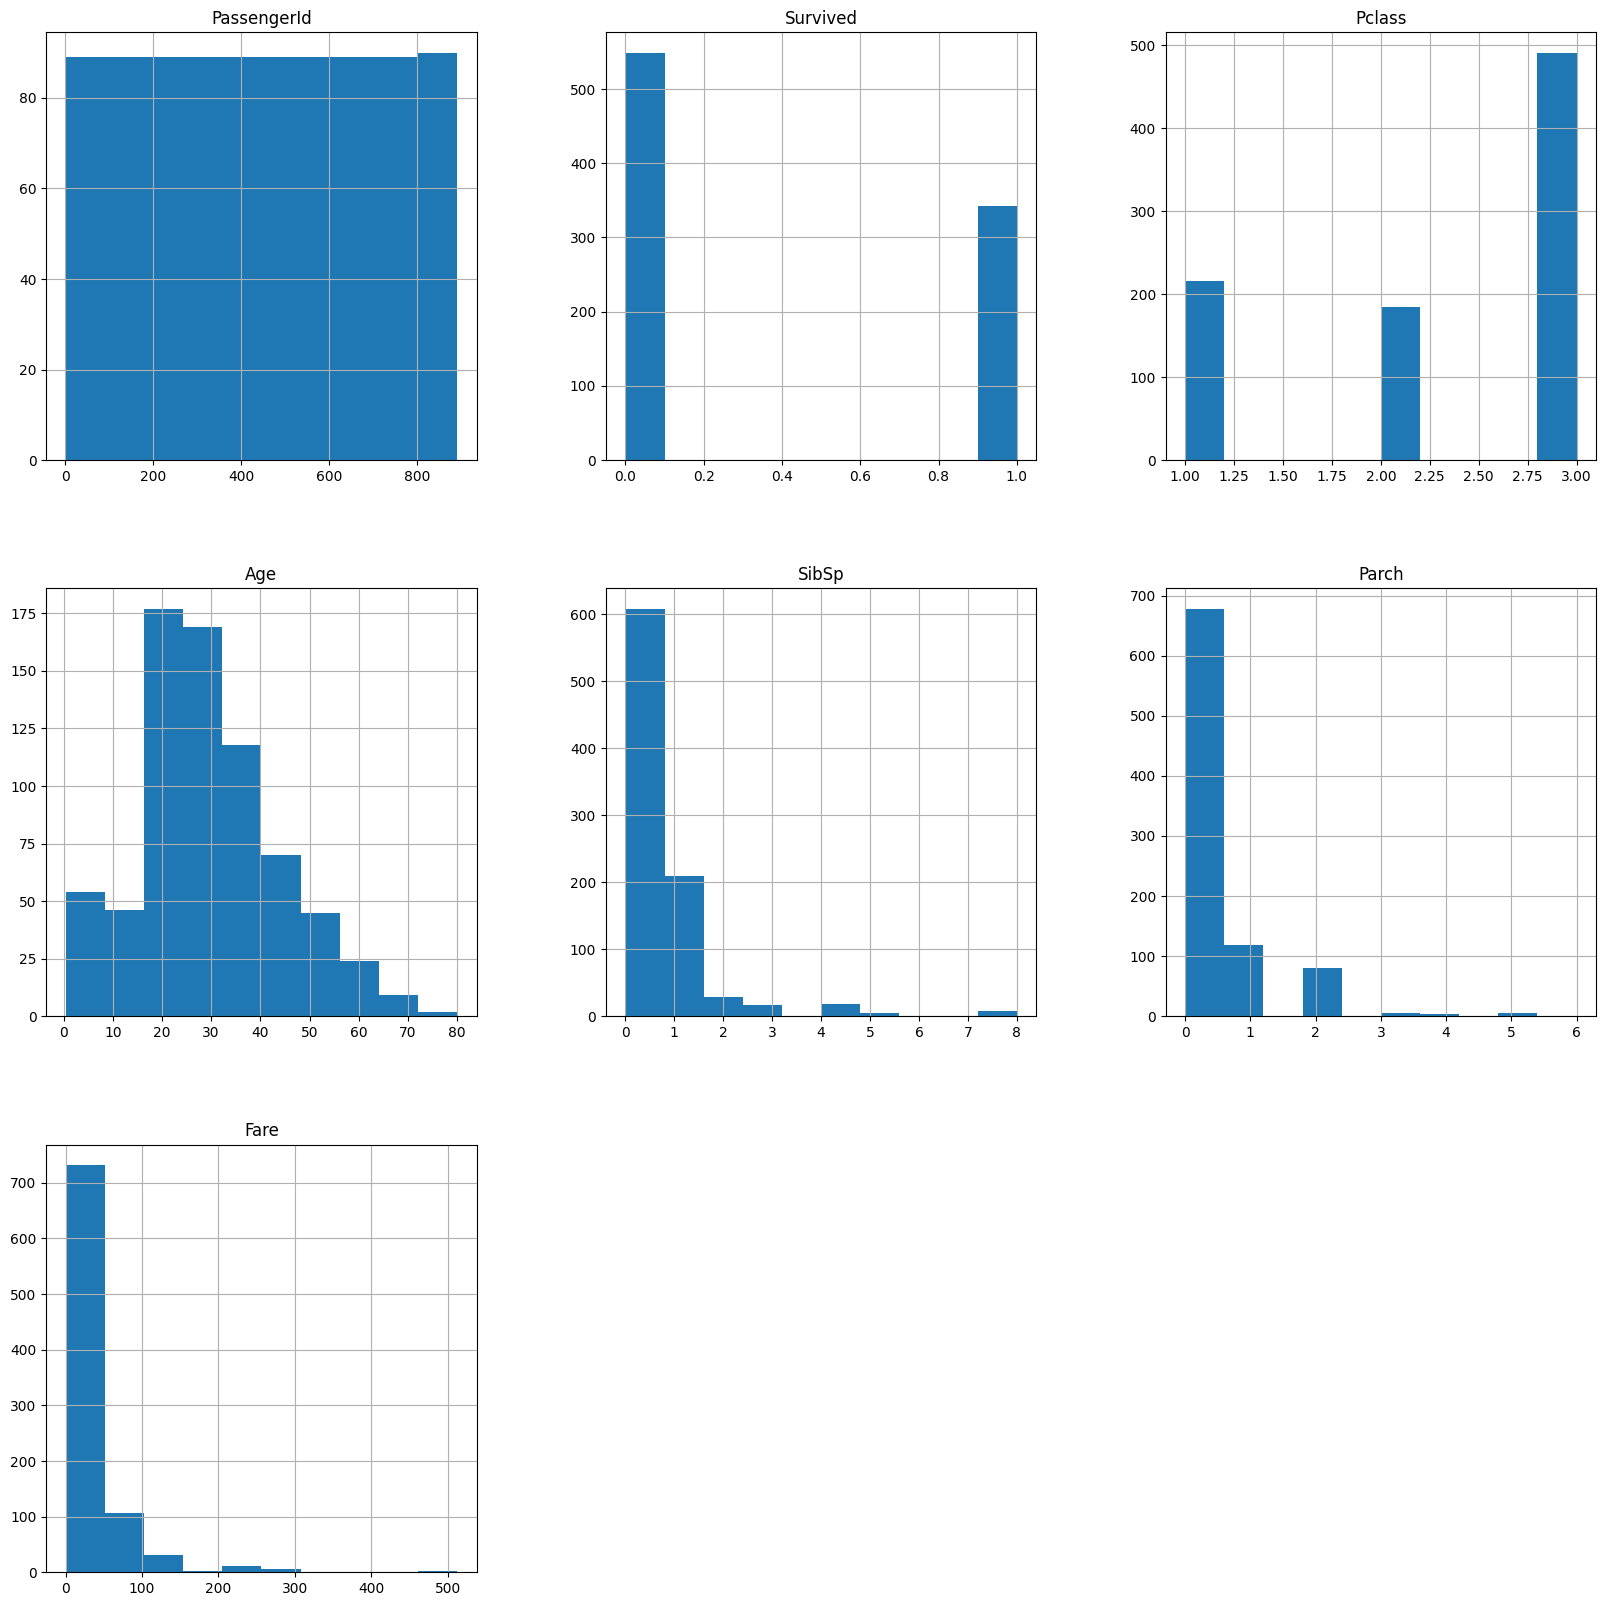

In [19]:
df.hist(figsize=(20,20))

In [20]:
df.groupby("Sex").count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [ ]:
# Transformación

In [31]:
# Filtro para los valores nulos
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,NaN
...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,7.0500,NaN
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,NaN
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,NaN


In [32]:
# Borrar nulos
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 1 to 889
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  185 non-null    int64  
 1   Survived     185 non-null    int64  
 2   Pclass       185 non-null    int64  
 3   Name         185 non-null    object 
 4   Sex          185 non-null    object 
 5   Age          185 non-null    int64  
 6   Fare         185 non-null    float64
 7   Cabin        185 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 13.0+ KB


In [38]:
df['Age'].unique()

array([38, 35, 54,  4, 58, 34, 28, 19, 49, 65, 45, 29, 25, 23, 46, 71, 21,
       47, 24, 32, 37, 36, 22, 61, 56, 50,  1,  3, 44,  2, 40, 31, 62, 30,
       52, 63,  0, 17, 18, 16, 41, 60, 27, 33, 14, 64, 48, 55, 39, 53, 42,
       80, 15, 70,  6, 51, 57, 43, 11, 26])

In [35]:
df['Age'] = df['Age'].astype(int)

In [39]:
df['Age'].unique()

array([38, 35, 54,  4, 58, 34, 28, 19, 49, 65, 45, 29, 25, 23, 46, 71, 21,
       47, 24, 32, 37, 36, 22, 61, 56, 50,  1,  3, 44,  2, 40, 31, 62, 30,
       52, 63,  0, 17, 18, 16, 41, 60, 27, 33, 14, 64, 48, 55, 39, 53, 42,
       80, 15, 70,  6, 51, 57, 43, 11, 26])

<ipython-input-40-db5e1ea41ef3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='seismic', annot=True)


<Axes: >

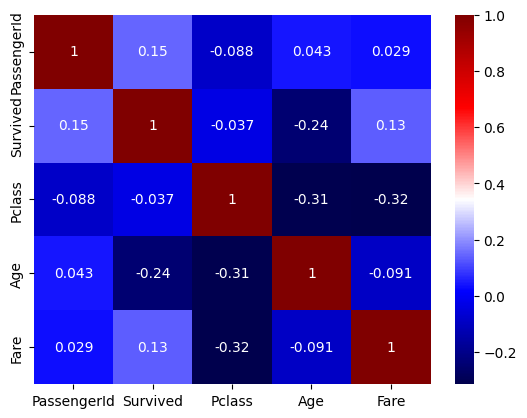

In [40]:
sns.heatmap(df.corr(), cmap='seismic', annot=True)

In [ ]:
#LOAD

In [41]:
conn = sqlite3.connect('titanic.db')
c = conn.cursor()
df.to_sql('pasajeros', conn, if_exists='replace', index=False)
conn.commit()

In [42]:
query = 'SELECT PassengerId, Survived FROM pasajeros LIMIT 5;'
c.execute(query)

for x in c.fetchall():
  print(x)

(2, 1)
(4, 1)
(7, 0)
(11, 1)
(12, 1)
